# TITANIC DATA SET INVESTIGATION

The dataset which is analyzed here is the Titanic dataset.The questions which we are going to target here are:

**Final Question: What are the factors which helped a survivor to survive the ship wreck?**

To answer the ***Final Question***, we need to answer the below questions first:

* Count of males & females in the total passenger list. Furthermore, adults(male/female) & children.
* Class of all the passengers & percentage of passengers in each class (Male & Female).
* Average age of passengers (Male, Female & Children)
* Passengers had there cabin in which deck.
    * *Assumption*: For passengers haiving multiple cabin only the 1st Cabin is considered as the deck reference.

* Survival rate based on Gender & Age
* Survival rate based on Family status i.e. the person was alone or with family.
* Survival rate based on Class & Deck

At first we will start with the import of all the required packages to analyze this data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Readin the *titanic_data.csv* file into the pandas DataFrame titanic_df 

In [2]:
titanic_df = pd.read_csv("titanic_data.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Defining a new column called **'person'** in order to differentiate between Adults & Children. Adults will be denoted as *Male/Female* & a passenger of Age < 16 is considered as a *Child*.

In [3]:
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Let's start by first looking at the overall males & females present in the tianic passengers list.

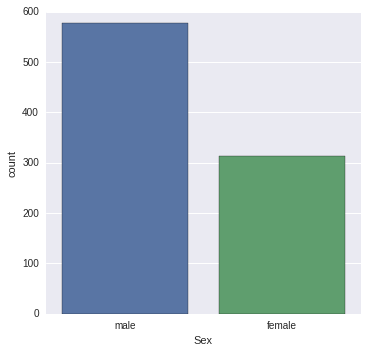

In [5]:
sns.factorplot('Sex', data = titanic_df, kind = 'count', size = 5)

From the above plot we can see that the most of the passengers were male passengers. Now going into further classification, i.e. males & females belonged to mostly in which class. Later we'll see based on the *person* factor i.e. adults & children

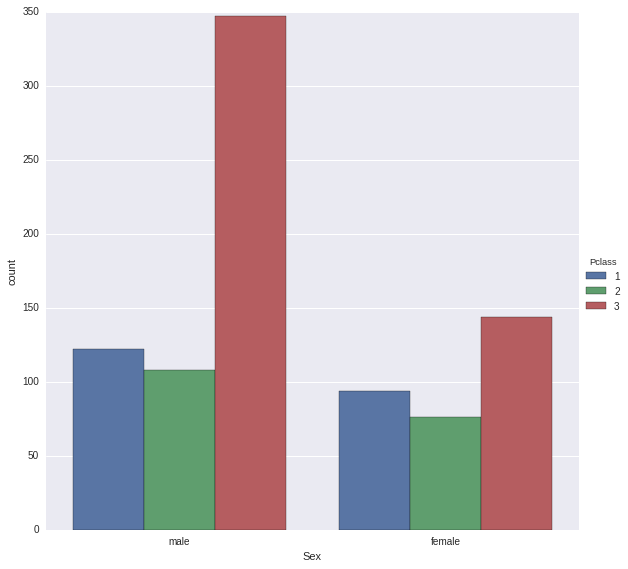

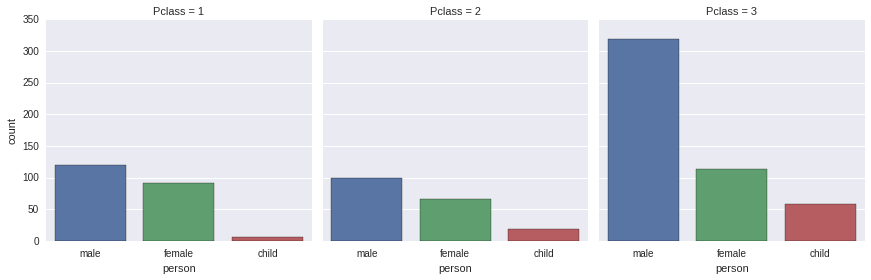

In [6]:
sns.factorplot('Sex', hue = 'Pclass', data = titanic_df, kind = 'count', size = 8)
sns.factorplot(x="person", col="Pclass", data=titanic_df, kind = 'count')

From the above 2 plots, we get a clear picture that major population was from *Class-3* males, followed by *Class-1* & *Class-2*. Children count was significantly less in *Class-1* & high in *Class-3*.

Now, let's look into the *Age* section. First let's see the average age of the passengers.

In [20]:
titanic_df_Age = titanic_df['Age'].mean()
titanic_df_Age

29.69911764705882

Average age is around 30. Below is the visualization on *Age*

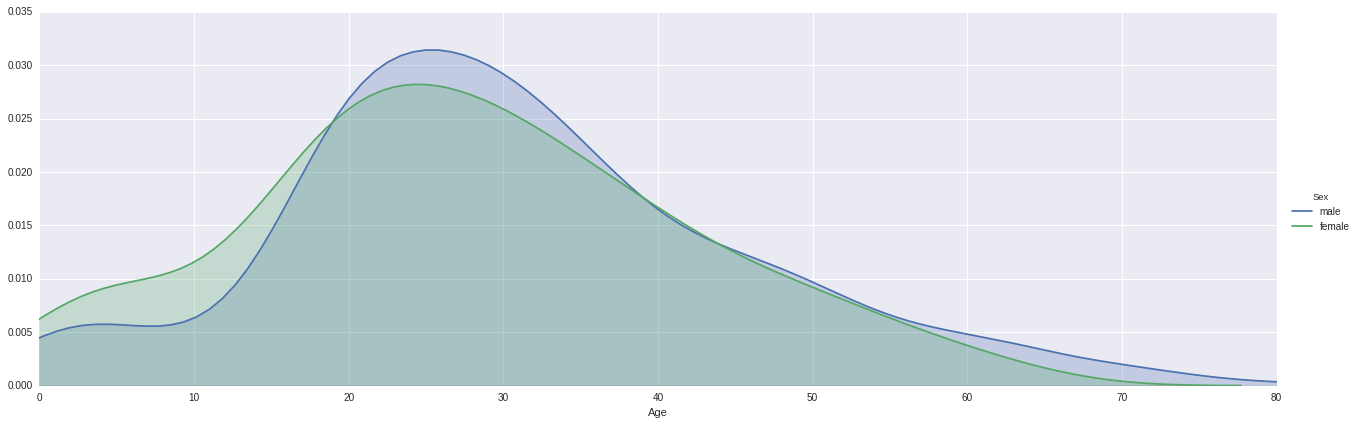

In [8]:
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=3, size = 6)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


# Data Wrangling

It is seen here that, both the Age & Deck Column are having a lot of null values.
For Age, the % of null values is quite less.

(714/891) x 100 = 19.86% ≈ 20%

These specific records can be ignored as when a statistical test is performed with a set of data, calculations are done with the data present within the interquartile range which is approximately 75% of the dataset around the median.

For Cabin, the number of null values is quite high. Hence, we'll consider those values as 'X' and continue our analysis. The first letter of the cabin will indicate the deck in which the person was present.

In [10]:
def c_d(cabin):
    return cabin[0]

titanic_df['Cabin'] = titanic_df['Cabin'].fillna('X')
titanic_df['deck'] = titanic_df['Cabin'].apply(c_d)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,male,X
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,female,X
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,male,X


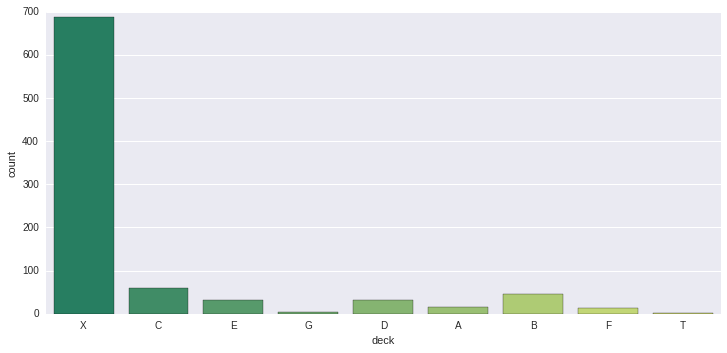

In [11]:
sns.factorplot('deck', data = titanic_df, kind = 'count', palette = 'summer', size = 5, aspect = 2)

Major passengers belonged to Deck 'X'.

Creating a new column 'Survivor' using the 'Survived' column and changing the '0' & '1' value to 'yes' & 'no'

In [12]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,deck,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,male,X,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,female,X,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,male,X,no


Checking the survival rate of passengers based on the deck they were in.

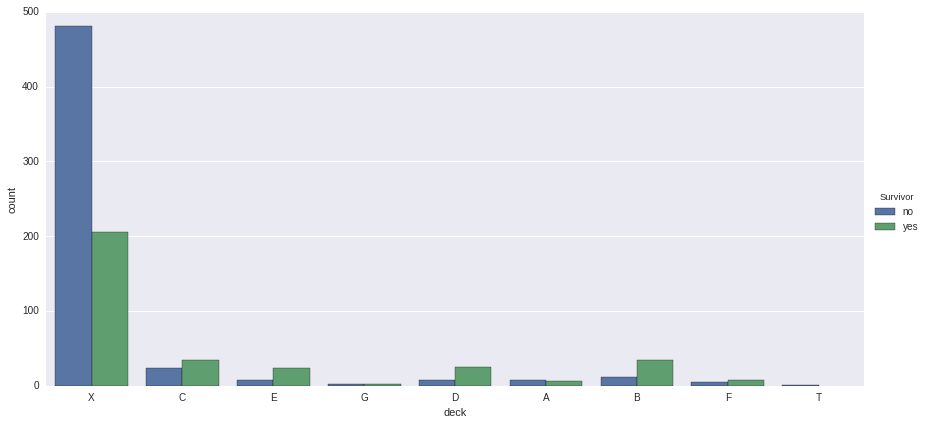

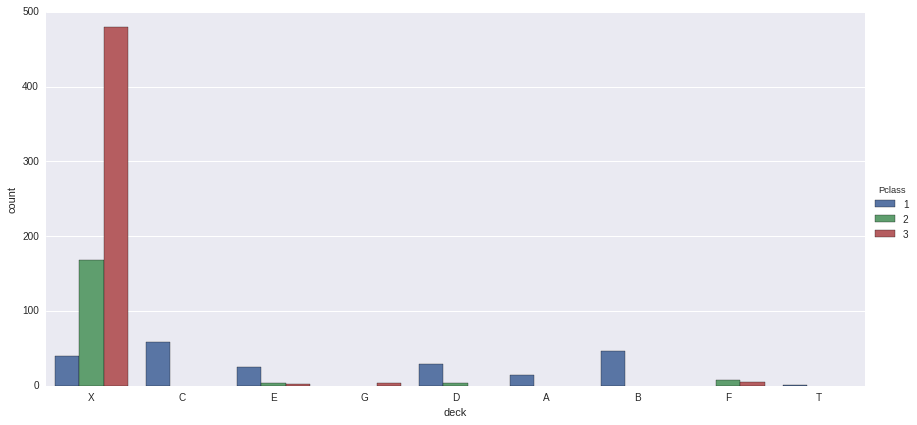

In [13]:
sns.factorplot(x = 'deck', hue = 'Survivor', data = titanic_df, kind = 'count', size = 6, aspect = 2)
sns.factorplot(x = 'deck', hue = 'Pclass', data = titanic_df, kind = 'count', size = 6, aspect = 2)

From the above 2 plots, we can see that number of non-survivors were from 'Deck-X' and people who belonged to 'Deck-X were from *Class-3*. These people can be the crew members of the ship. But, there were also a significant number of people who belonged to *Class-2* & *Class-1* who are in 'Deck-X'

So, checking the data by removing the people from 'Deck-X'.

In [14]:
titanic_df_new = titanic_df.drop(titanic_df[titanic_df.deck == 'X'].index)
titanic_df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,deck,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E,no
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G,yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C,yes


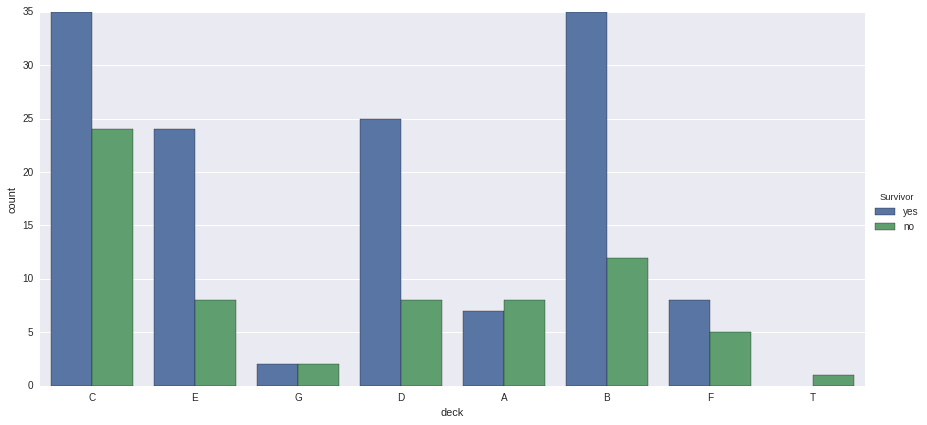

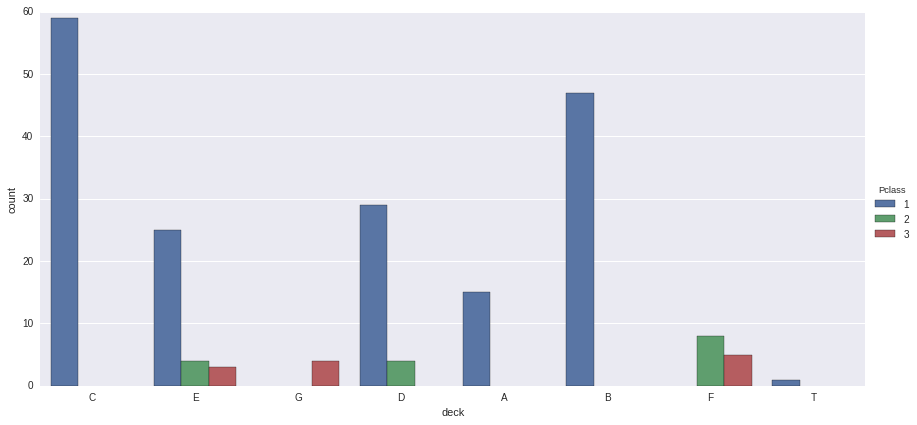

In [15]:
sns.factorplot(x = 'deck', hue = 'Survivor', data = titanic_df_new, 
               kind = 'count', size = 6, aspect = 2)
sns.factorplot(x = 'deck', hue = 'Pclass', data = titanic_df_new, kind = 'count', size = 6, aspect = 2)

From the above 2 plots we can see, that most of the survivors belonged to Deck-C & Deck-B, followed by Deck-E & Deck-D. The major population of all those decks were from Class-1.

Hence, we are getting a trend that the people from Class-1 were the higest survivors.

Checking the Survival rate of a passenger based on it's class and gender group (adule male/adult female/child)

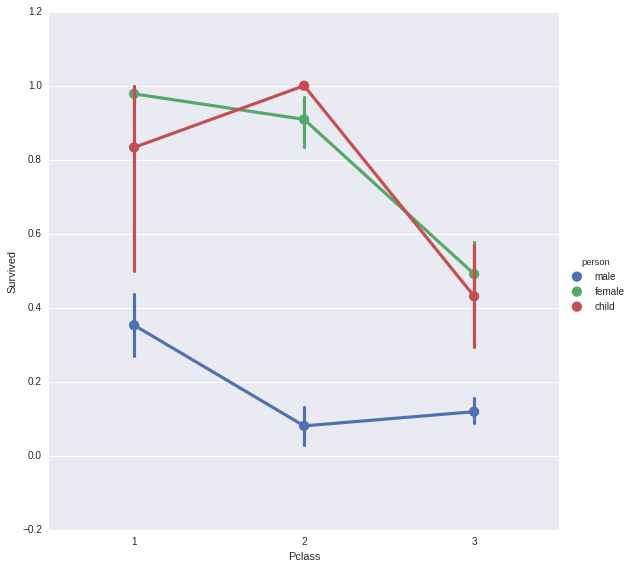

In [16]:
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'person', data = titanic_df, kind = 'point', size = 8)

From the above point plot we can see most of the people from class 3 is having a low survival percentage.
Among them, if the person was a female or a child from class-1 or class-2, the survival chance is higher.
An  adult male has the lowest survival chance. Among males, if he belongs to class-1 his chance of survival
is higher compared to the males from other 2 classes.

Now, coming to the point of 'Age' i.e. how age played a role in the survival chance of males & females.

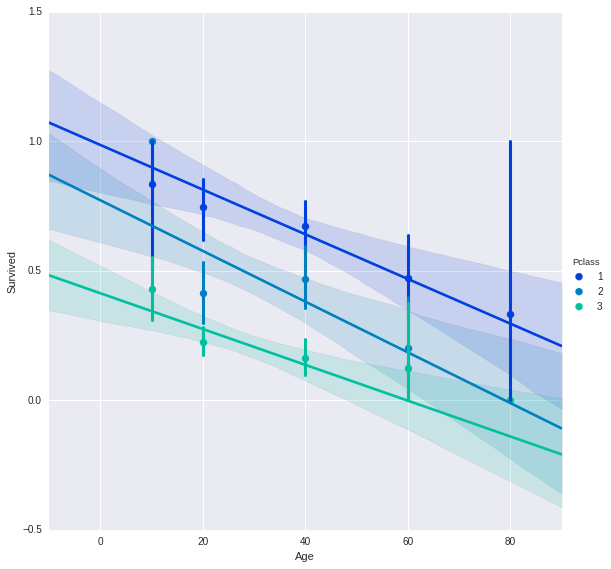

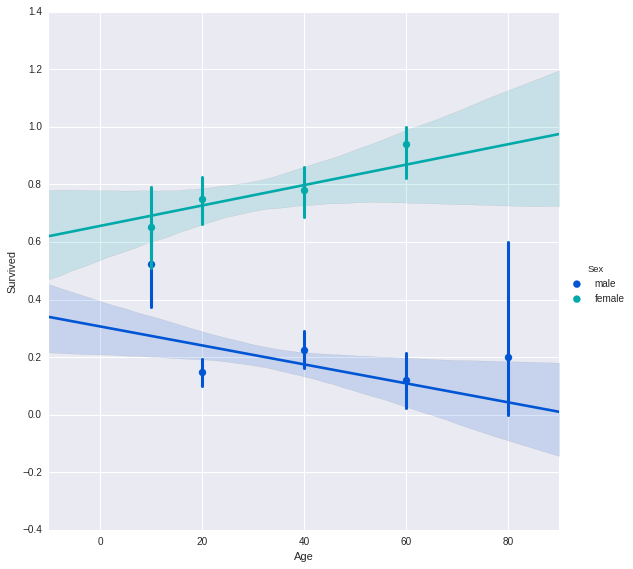

In [22]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations, size = 8)
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations, size = 8)

From the above two regplot, we can see that if a person belongs to Class-1 has a higher chance of survival.
Among the Class-1, being an elderly person i.e. above 60 years of age (appx.), has higher chance of survival. If the elderly person is a female, that person has the highest chance of survival.

Overall, a person belonging to Class-1, Female and above 60 years of age has the highest chance of survival.

Now, let's see how did the factor of being alone or with a family had an effect on the survival. For this a new column 'Family', is created. Determined by adding up the sibling & parents column.

/home/archie/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


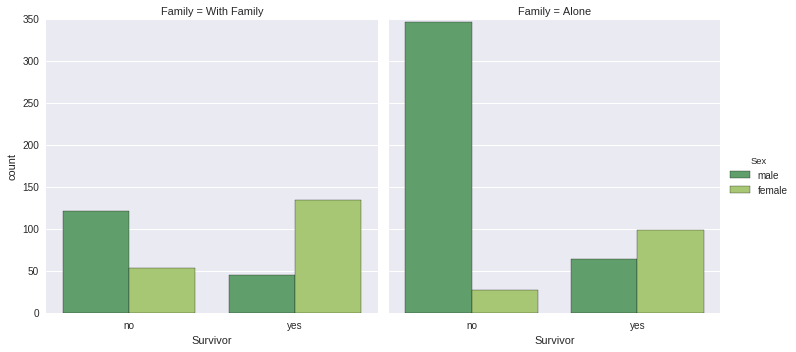

In [18]:
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['Family'].loc[titanic_df['Family'] >0] = 'With Family'
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 'Alone'
sns.factorplot("Survivor", col="Family", hue = 'Sex', palette = 'summer',
               data=titanic_df, kind="count", size = 5, aspect = 1, col_wrap = 2)

In both the cases, we can see that being a female is having a higher chance of survival.

# Conclusion

From the above analysis of the provided dataset, we can see that there is a correlation between female passenger from class-1 and survival chance. But, we cannot conclude that being a female passenger form class-1 is the cause of their survival. This is because there are survivors from other class of passengers as well.
Some drawbacks with the data set which if not present might lead to more defined conclusion.
They are listed below:

*a.* Missing values: The details of the deck. We have cosidered only those passengers for whom we had the cabin details and that was approximately 23% of the whole dataset. The actual details of Deck_X can bring a significant change in the analysis.

*b.* Other factors like the process of survival is not present in the data set i.e. life boats, life jackets etc.

Considering the above factors and by performing a Z-Test on each case we can get a probable set of results which will help to reach a precise conclusion.
